# Ann John
# Matriculation No.50784111

# Part I: Data Manipulation and Analysis

### 1. Import the dataset into a pandas dataframe. Make sure that the date column is in pandas data time format

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 2. Check the data type of each column. How many rows are there in the dataset ? Does the dataset contain any missing values ?

In [17]:
print(df.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [18]:
df.shape[0]

10886

#### There are 10886 rows in the dataset.

In [19]:
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


#### There are no null values in the dataset

### 3.Using the date column, create new columns for: year, month, day of the week and hour of the day.

In [20]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

### 4. Rename the values in the season column to spring, summer, fall and winter.

In [21]:
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_map)

In [22]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,Wednesday,22


### 5.Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

In [23]:
rentals_by_year = df.groupby('year')[['casual', 'registered']].sum()
print(rentals_by_year)

      casual  registered
year                    
2011  155817      626162
2012  236318     1067179


### 6.Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?

In [24]:
df.groupby('season')['count'].mean()

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64

#### Fall is the season that has the highest mean

### 7.Are more bikes rented by registered users on working or non-working days ? Does the answer differ for non-registered users ? Is the answer the same for both years ?

In [25]:
working_day_rentals = df.groupby(['workingday']) [['registered']].sum()
print(working_day_rentals)

            registered
workingday            
0               448835
1              1244506


#### Bikes rented by registered users on working days are more than non-working days. 

In [26]:
working_day_rentals = df.groupby(['workingday']) [['casual']].sum()
print(working_day_rentals)

            casual
workingday        
0           206037
1           186098


#### Yes the the answer does differ for non-registered users

In [27]:
# Ensure datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year from the datetime column
df['year'] = df['datetime'].dt.year

# Sum registered and casual rentals grouped by year and workingday
registered_by_year = df.groupby(['year', 'workingday'])['registered'].sum()
casual_by_year = df.groupby(['year', 'workingday'])['casual'].sum()

# Display results
print("Registered Rentals by Year and Working Day:\n", registered_by_year)
print("Casual Rentals by Year and Working Day:\n", casual_by_year)


Registered Rentals by Year and Working Day:
 year  workingday
2011  0             167492
      1             458670
2012  0             281343
      1             785836
Name: registered, dtype: int64
Casual Rentals by Year and Working Day:
 year  workingday
2011  0              83099
      1              72718
2012  0             122938
      1             113380
Name: casual, dtype: int64


In [28]:
# Registered
#2011
(458670)/(167492+458670)

0.7325101171901202

In [29]:
#2012
(785836)/(281343+785836)

0.7363675634546781

In [30]:
# Casual 
# 2011
(72718)/(83099+72718)

0.46668848713555006

In [31]:
#2012
(113380)/(122938+113380)

0.47977724929967247

#### The results for both years for the registered users are not different, it is approximately 73% for both years. It is the same for the casual users approximately 47% in 2011 and 48% in 2012 (a slight difference).

### 8.Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012.

In [32]:
rentals_2011 = df[df['year'] == 2011].groupby('month')['count'].sum()
print(rentals_2011)

month
1     23552
2     32844
3     38735
4     50517
5     79713
6     89776
7     92848
8     83296
9     79104
10    79522
11    70889
12    61183
Name: count, dtype: int64


#### Highest total numbers of bike rented = July 
#### Lowest total numbers of bike rented = January 

In [33]:
rentals_2012 = df[df['year'] == 2012].groupby('month')['count'].sum()
print(rentals_2012)

month
1      56332
2      66269
3      94766
4     116885
5     120434
6     130957
7     121769
8     130220
9     133425
10    127912
11    105551
12     98977
Name: count, dtype: int64


#### Highest total numbers of bike rented = September 
#### Lowest total numbers of bike rented = January 

### 9.Which type of weather have the highest and lowest mean of the hourly total rentals count ?

In [34]:
mean_rentals_by_weather = df.groupby('weather')['count'].mean()
highest_weather = mean_rentals_by_weather.idxmax()
lowest_weather = mean_rentals_by_weather.idxmin()
print(mean_rentals_by_weather)
print(highest_weather)  
print(lowest_weather)

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64
1
3


#### Highest mean of the hourly total rentals count = weather type 1
#### lowest mean of the hourly total rentals count = weather type 3

### 10.Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count ?

In [35]:
import numpy as np

In [36]:
num=df.select_dtypes(include=np.number)

In [37]:
correlations = num.corr()

In [38]:
print(correlations['count'].sort_values(ascending=False))

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


#### The column with the highest correlation with the count (total rentals) is the registered column, with a correlation value of 0.970948. This indicates strong positive correlation.



### 11.Create a new categorical column called day_period, which can take four possible values: night, morning, afternoon and evening. These values correspond to the following binning of the hour column: 0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening.

In [39]:
def assign_period(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['day_period'] = df['hour'].apply(assign_period)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour,day_period
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0,night
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1,night
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2,night
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3,night
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19,evening
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20,evening
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21,evening
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,Wednesday,22,evening


### 12.Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

In [40]:
pivot_table = df.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')
print(pivot_table)

workingday           0           1
day_period                        
afternoon   371.022989  266.196141
evening     180.182759  251.054662
morning     157.772414  234.353763
night        44.052083   16.217582


#### Observations by Day Period:
#### Afternoon:
#### The highest mean rentals occur in the afternoon, especially on non-working days with an average of 371 rentals and For working days, the rentals are lower (266), likely due to people being at work during this time.
#### Evening:
#### On working days, the evening shows a high mean rental count of 251, second only to the afternoon. This suggests significant activity after work hours.On non-working days, the evening rentals are lower (180) compared to afternoons, indicating reduced demand as the day winds down.
#### Morning:
#### The rentals are higher on working days (234) compared to non-working days (157). This may reflect commuter usage on working days.
#### Night
#### Rentals are minimal at night for both working and non-working days, with the lowest mean rentals of 44 (non-working) and 16 (working).


# Part II: Data Visualisation

### 1. Plot the distributions of all the numerical columns in the dataset using histograms.

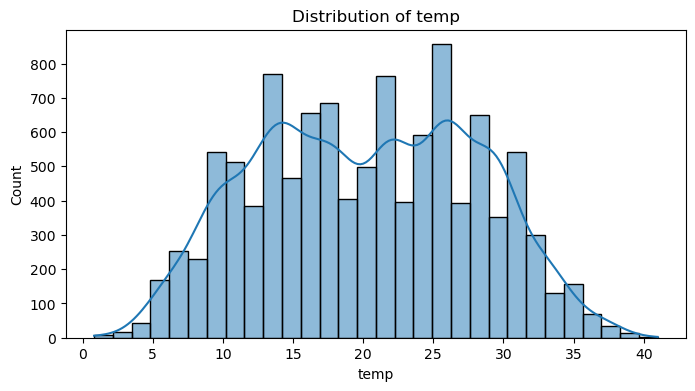

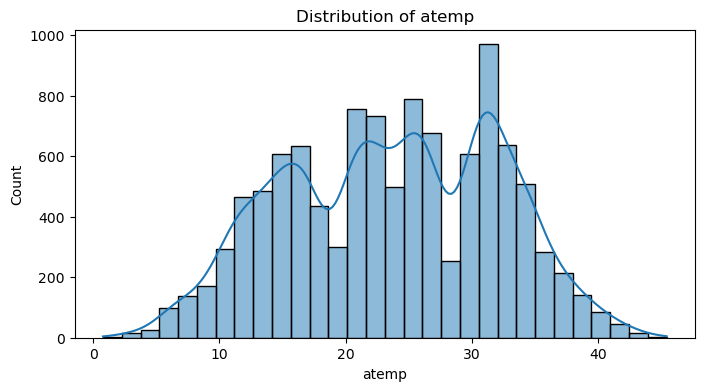

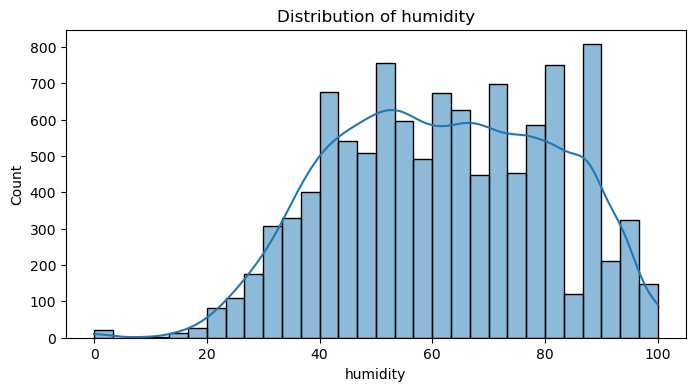

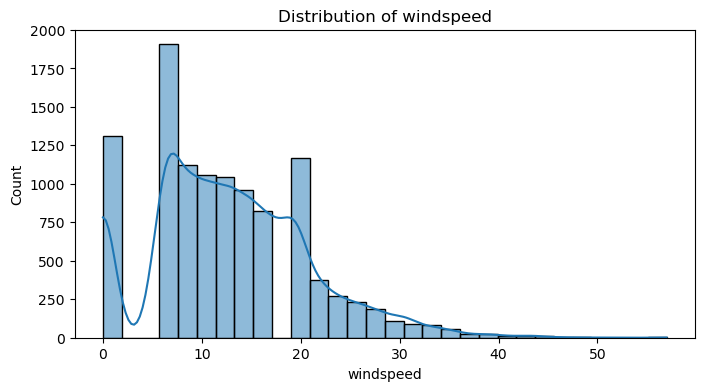

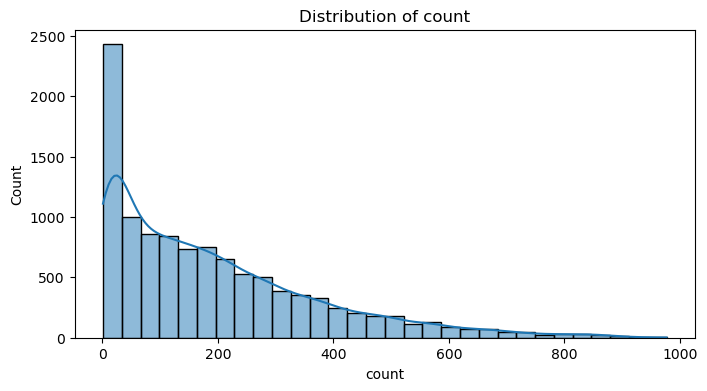

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### 2. Plot the distributions of all the numerical columns in the dataset using box plots.

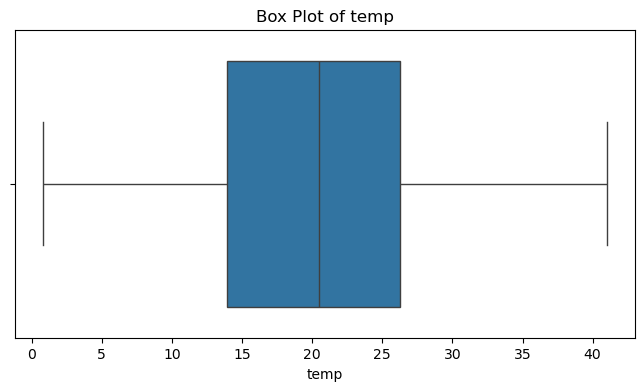

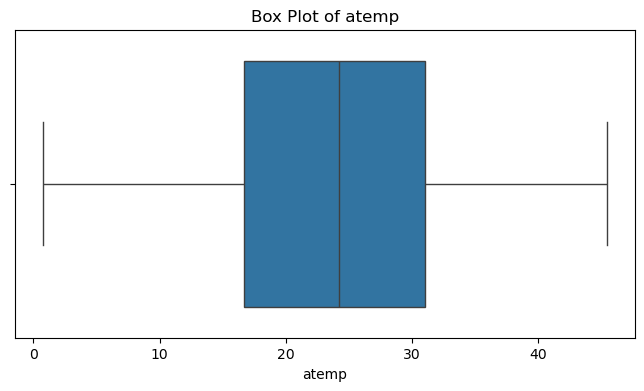

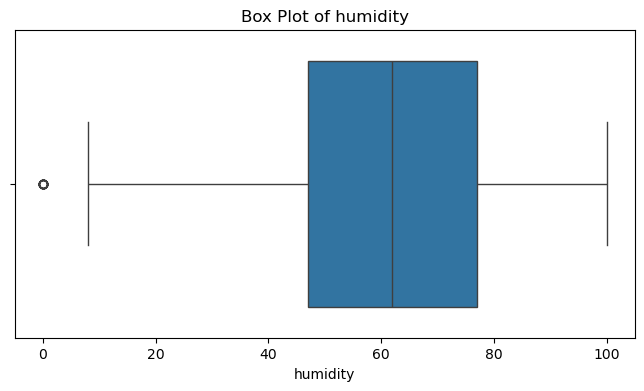

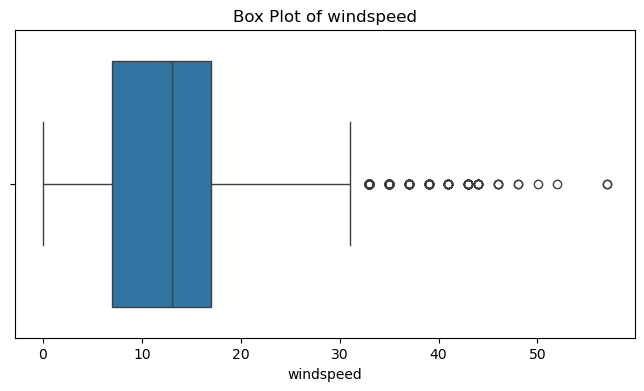

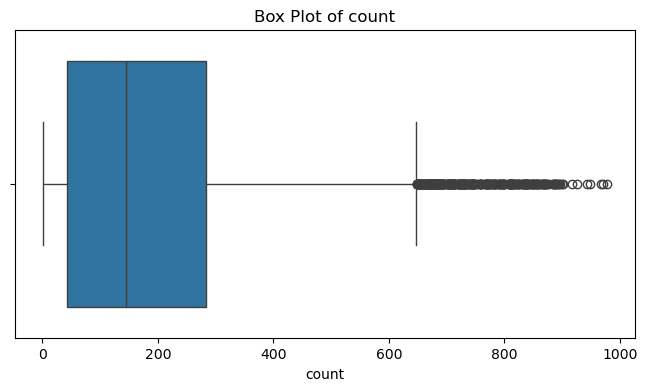

In [42]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

### 3. Plot the the mean of the hourly total rentals count for working and non-working days.

C:\Users\asus\AppData\Local\Temp\ipykernel_19684\1881291487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_means, x='workingday', y='count', palette='vlag')


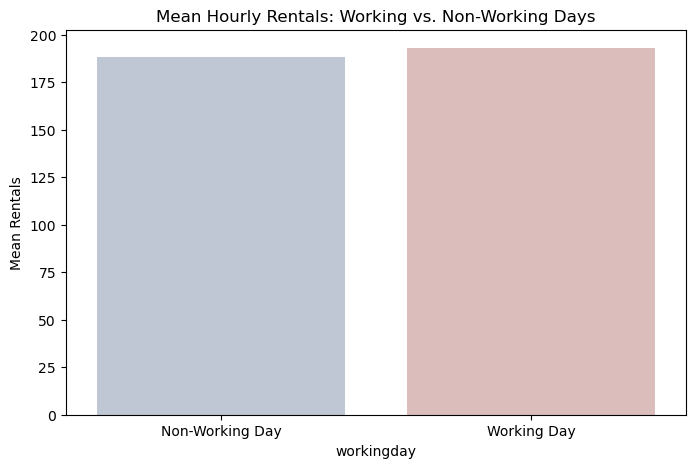

In [43]:
# Calculate mean rentals by working day
workingday_means = df.groupby('workingday')['count'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=workingday_means, x='workingday', y='count', palette='vlag')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.title('Mean Hourly Rentals: Working vs. Non-Working Days')
plt.ylabel('Mean Rentals')
plt.show()

### 4.Plot the the mean of the hourly total rentals count for the different months for both years combined.

C:\Users\asus\AppData\Local\Temp\ipykernel_19684\3789856140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_means, x='month', y='count', palette='Spectral')


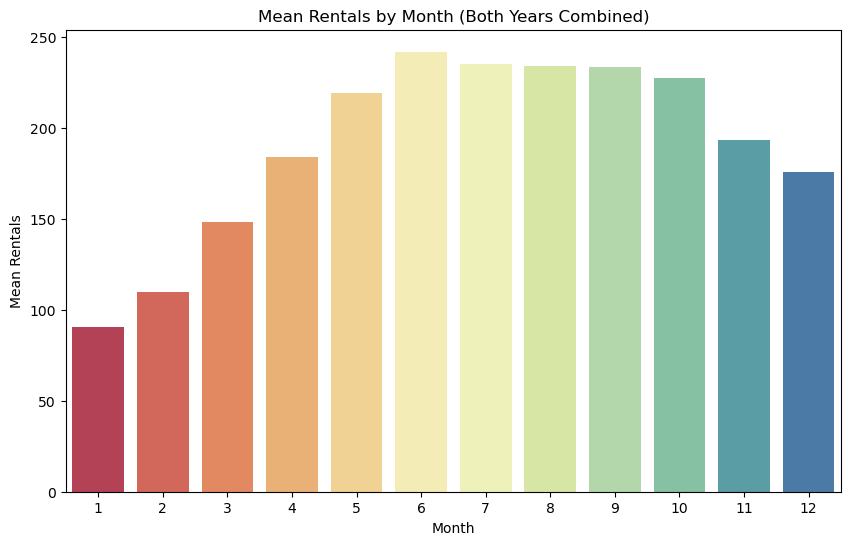

In [44]:
# Calculate mean rentals by month
monthly_means = df.groupby('month')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_means, x='month', y='count', palette='Spectral')
plt.title('Mean Rentals by Month (Both Years Combined)')
plt.xlabel('Month')
plt.ylabel('Mean Rentals')
plt.show()

### 5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


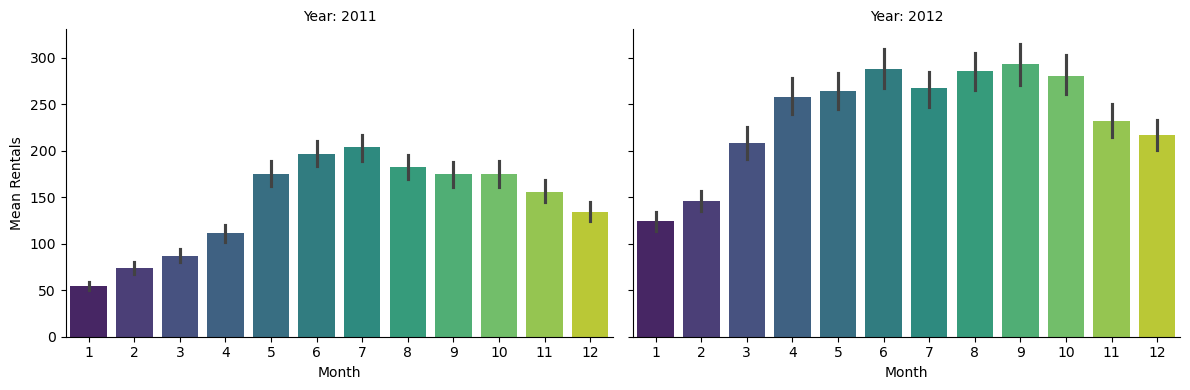

In [46]:
g = sns.FacetGrid(df, col='year', height=4, aspect=1.5)
g.map(sns.barplot, 'month', 'count', order=range(1, 13), palette='viridis')
g.set_titles("Year: {col_name}")
g.set_axis_labels('Month', 'Mean Rentals')
plt.show()

### 6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

C:\Users\asus\AppData\Local\Temp\ipykernel_19684\1413463129.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='weather', y='count', palette='Set2', ci=95)
C:\Users\asus\AppData\Local\Temp\ipykernel_19684\1413463129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='weather', y='count', palette='Set2', ci=95)


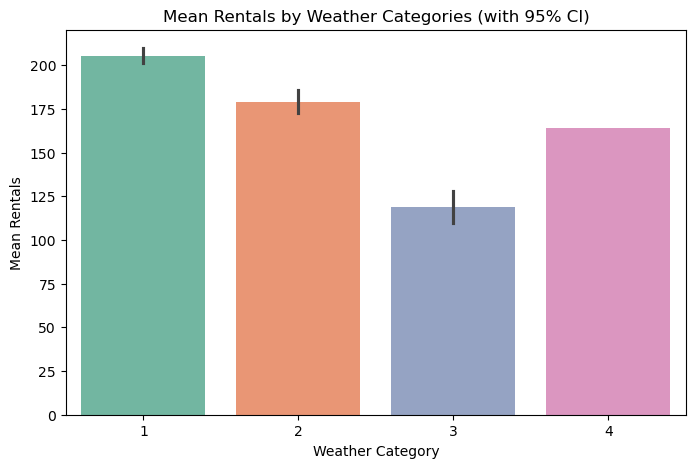

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='weather', y='count', palette='Set2', ci=95)
plt.title('Mean Rentals by Weather Categories (with 95% CI)')
plt.xlabel('Weather Category')
plt.ylabel('Mean Rentals')
plt.show()

### 7. Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

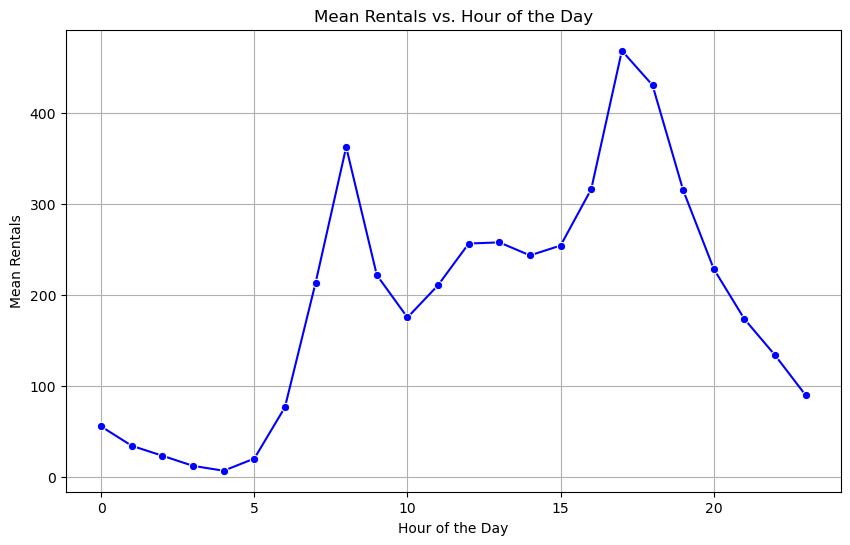

In [48]:
hourly_means = df.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_means, x='hour', y='count', marker='o', color='blue')
plt.title('Mean Rentals vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Rentals')
plt.grid()
plt.show()

### 8. Repeat the plot in 7 for different days of the week. What patterns can you observe ?

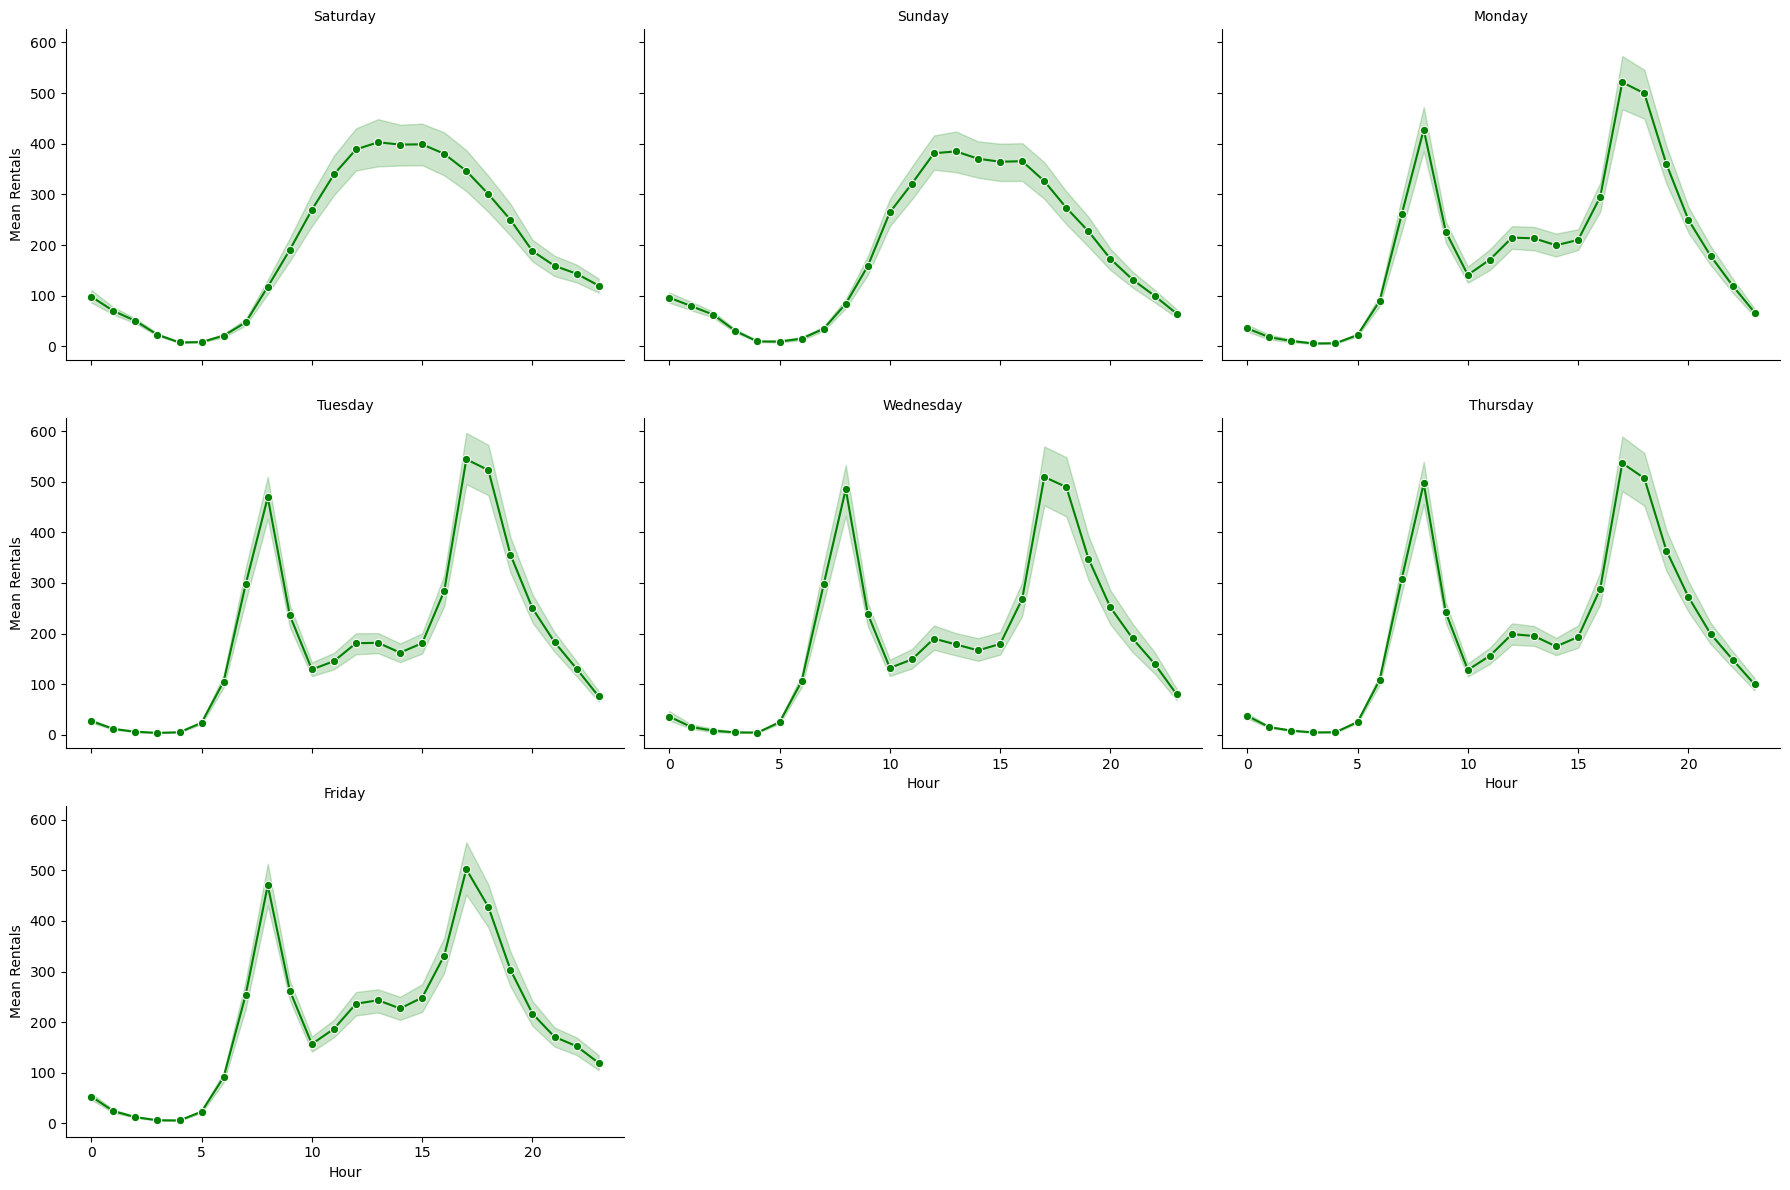

In [49]:
# Plot hourly rentals by day of the week
g = sns.FacetGrid(df, col='day_of_week', col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'hour', 'count', marker='o', color='green')
g.set_titles("{col_name}")
g.set_axis_labels('Hour', 'Mean Rentals')
plt.show()

### 9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

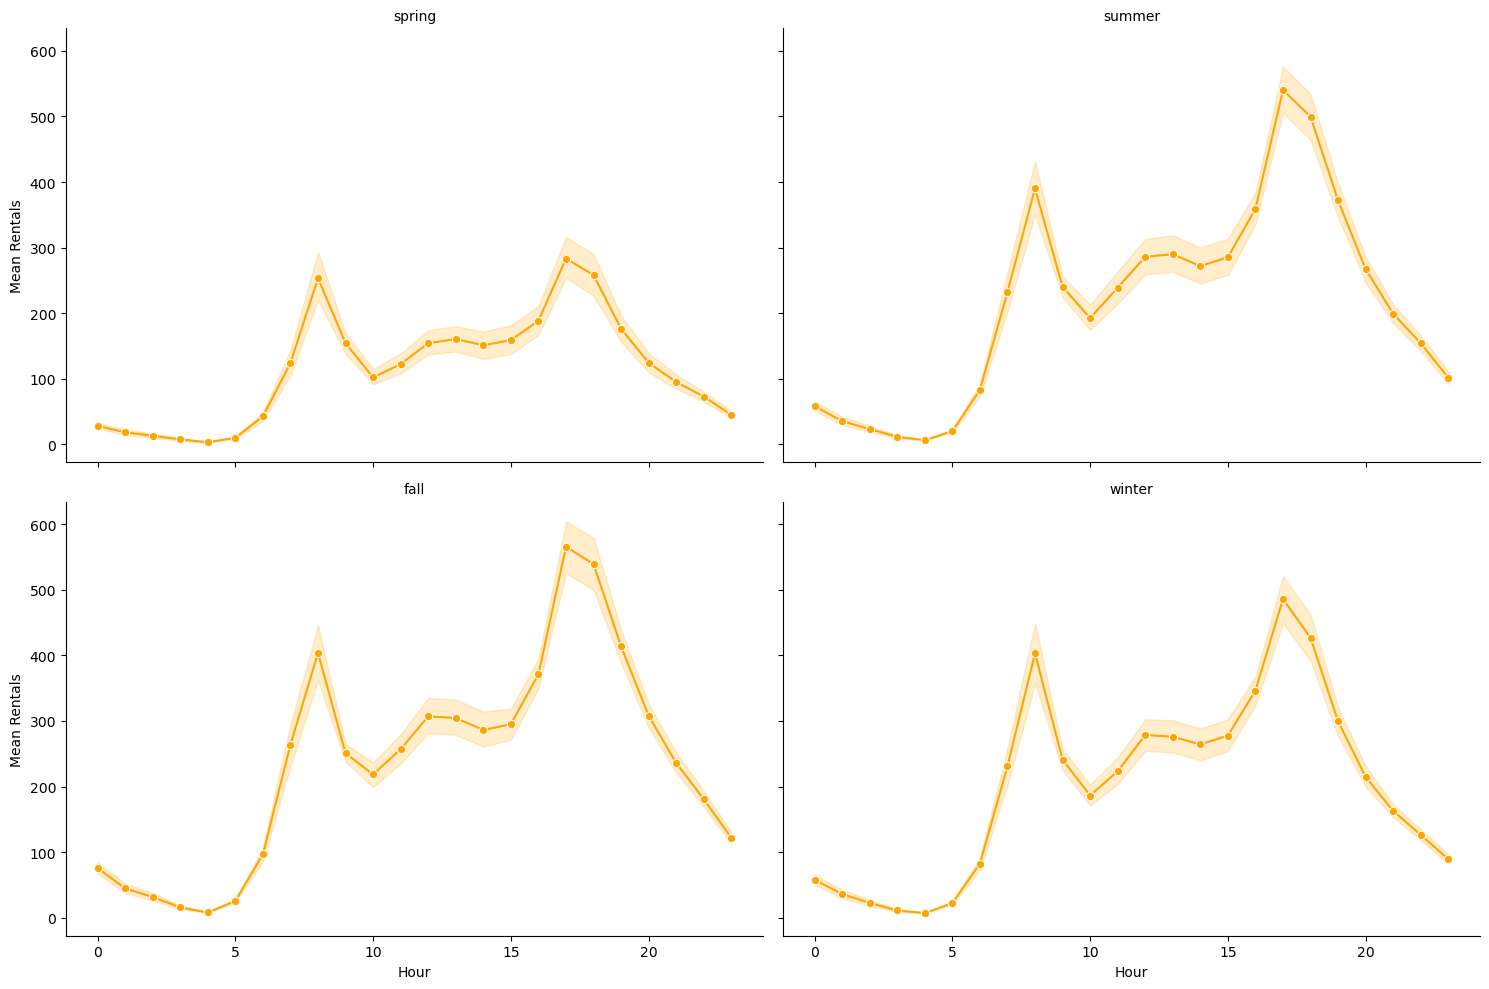

In [50]:
# Plot hourly rentals by season
g = sns.FacetGrid(df, col='season', col_wrap=2, height=5, aspect=1.5)
g.map(sns.lineplot, 'hour', 'count', marker='o', color='orange')
g.set_titles("{col_name}")
g.set_axis_labels('Hour', 'Mean Rentals')
plt.show()

### 10. Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

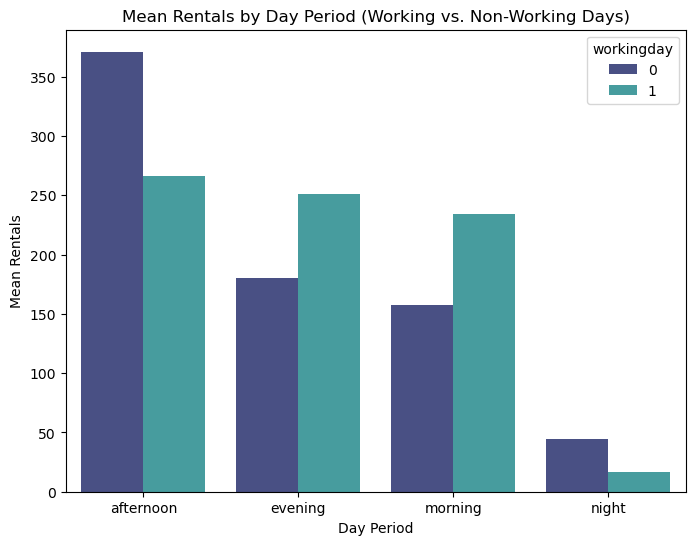

In [51]:
# Calculate mean rentals by day period and working day
day_period_means = df.groupby(['day_period', 'workingday'])['count'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=day_period_means, x='day_period', y='count', hue='workingday', palette='mako')
plt.title('Mean Rentals by Day Period (Working vs. Non-Working Days)')
plt.xlabel('Day Period')
plt.ylabel('Mean Rentals')
plt.show()

### 11. Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?

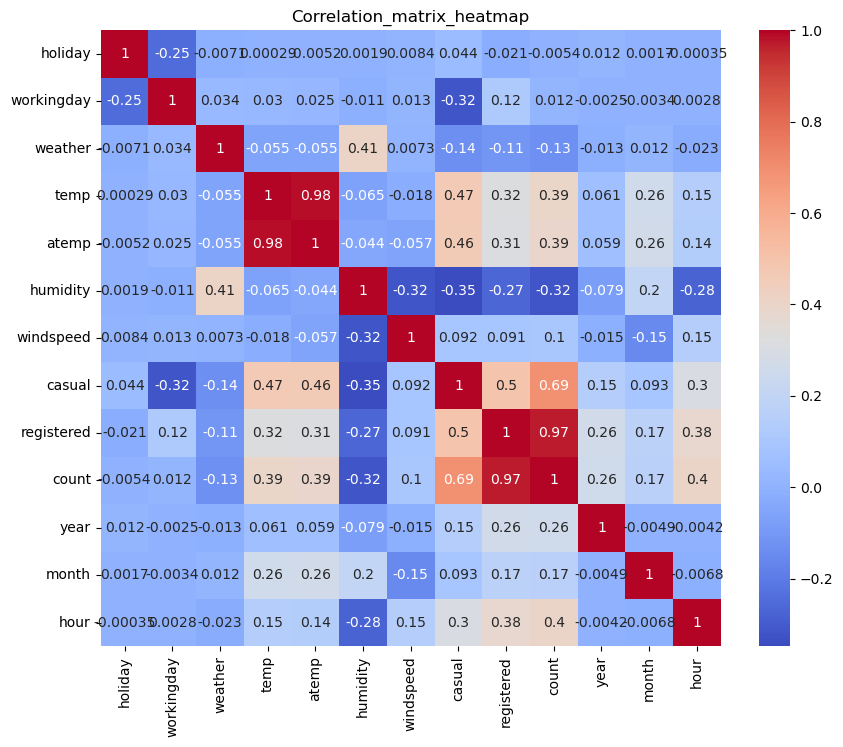

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation_matrix_heatmap')
plt.show()